## Student grade prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\kandu\Downloads\student-mat.csv")
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

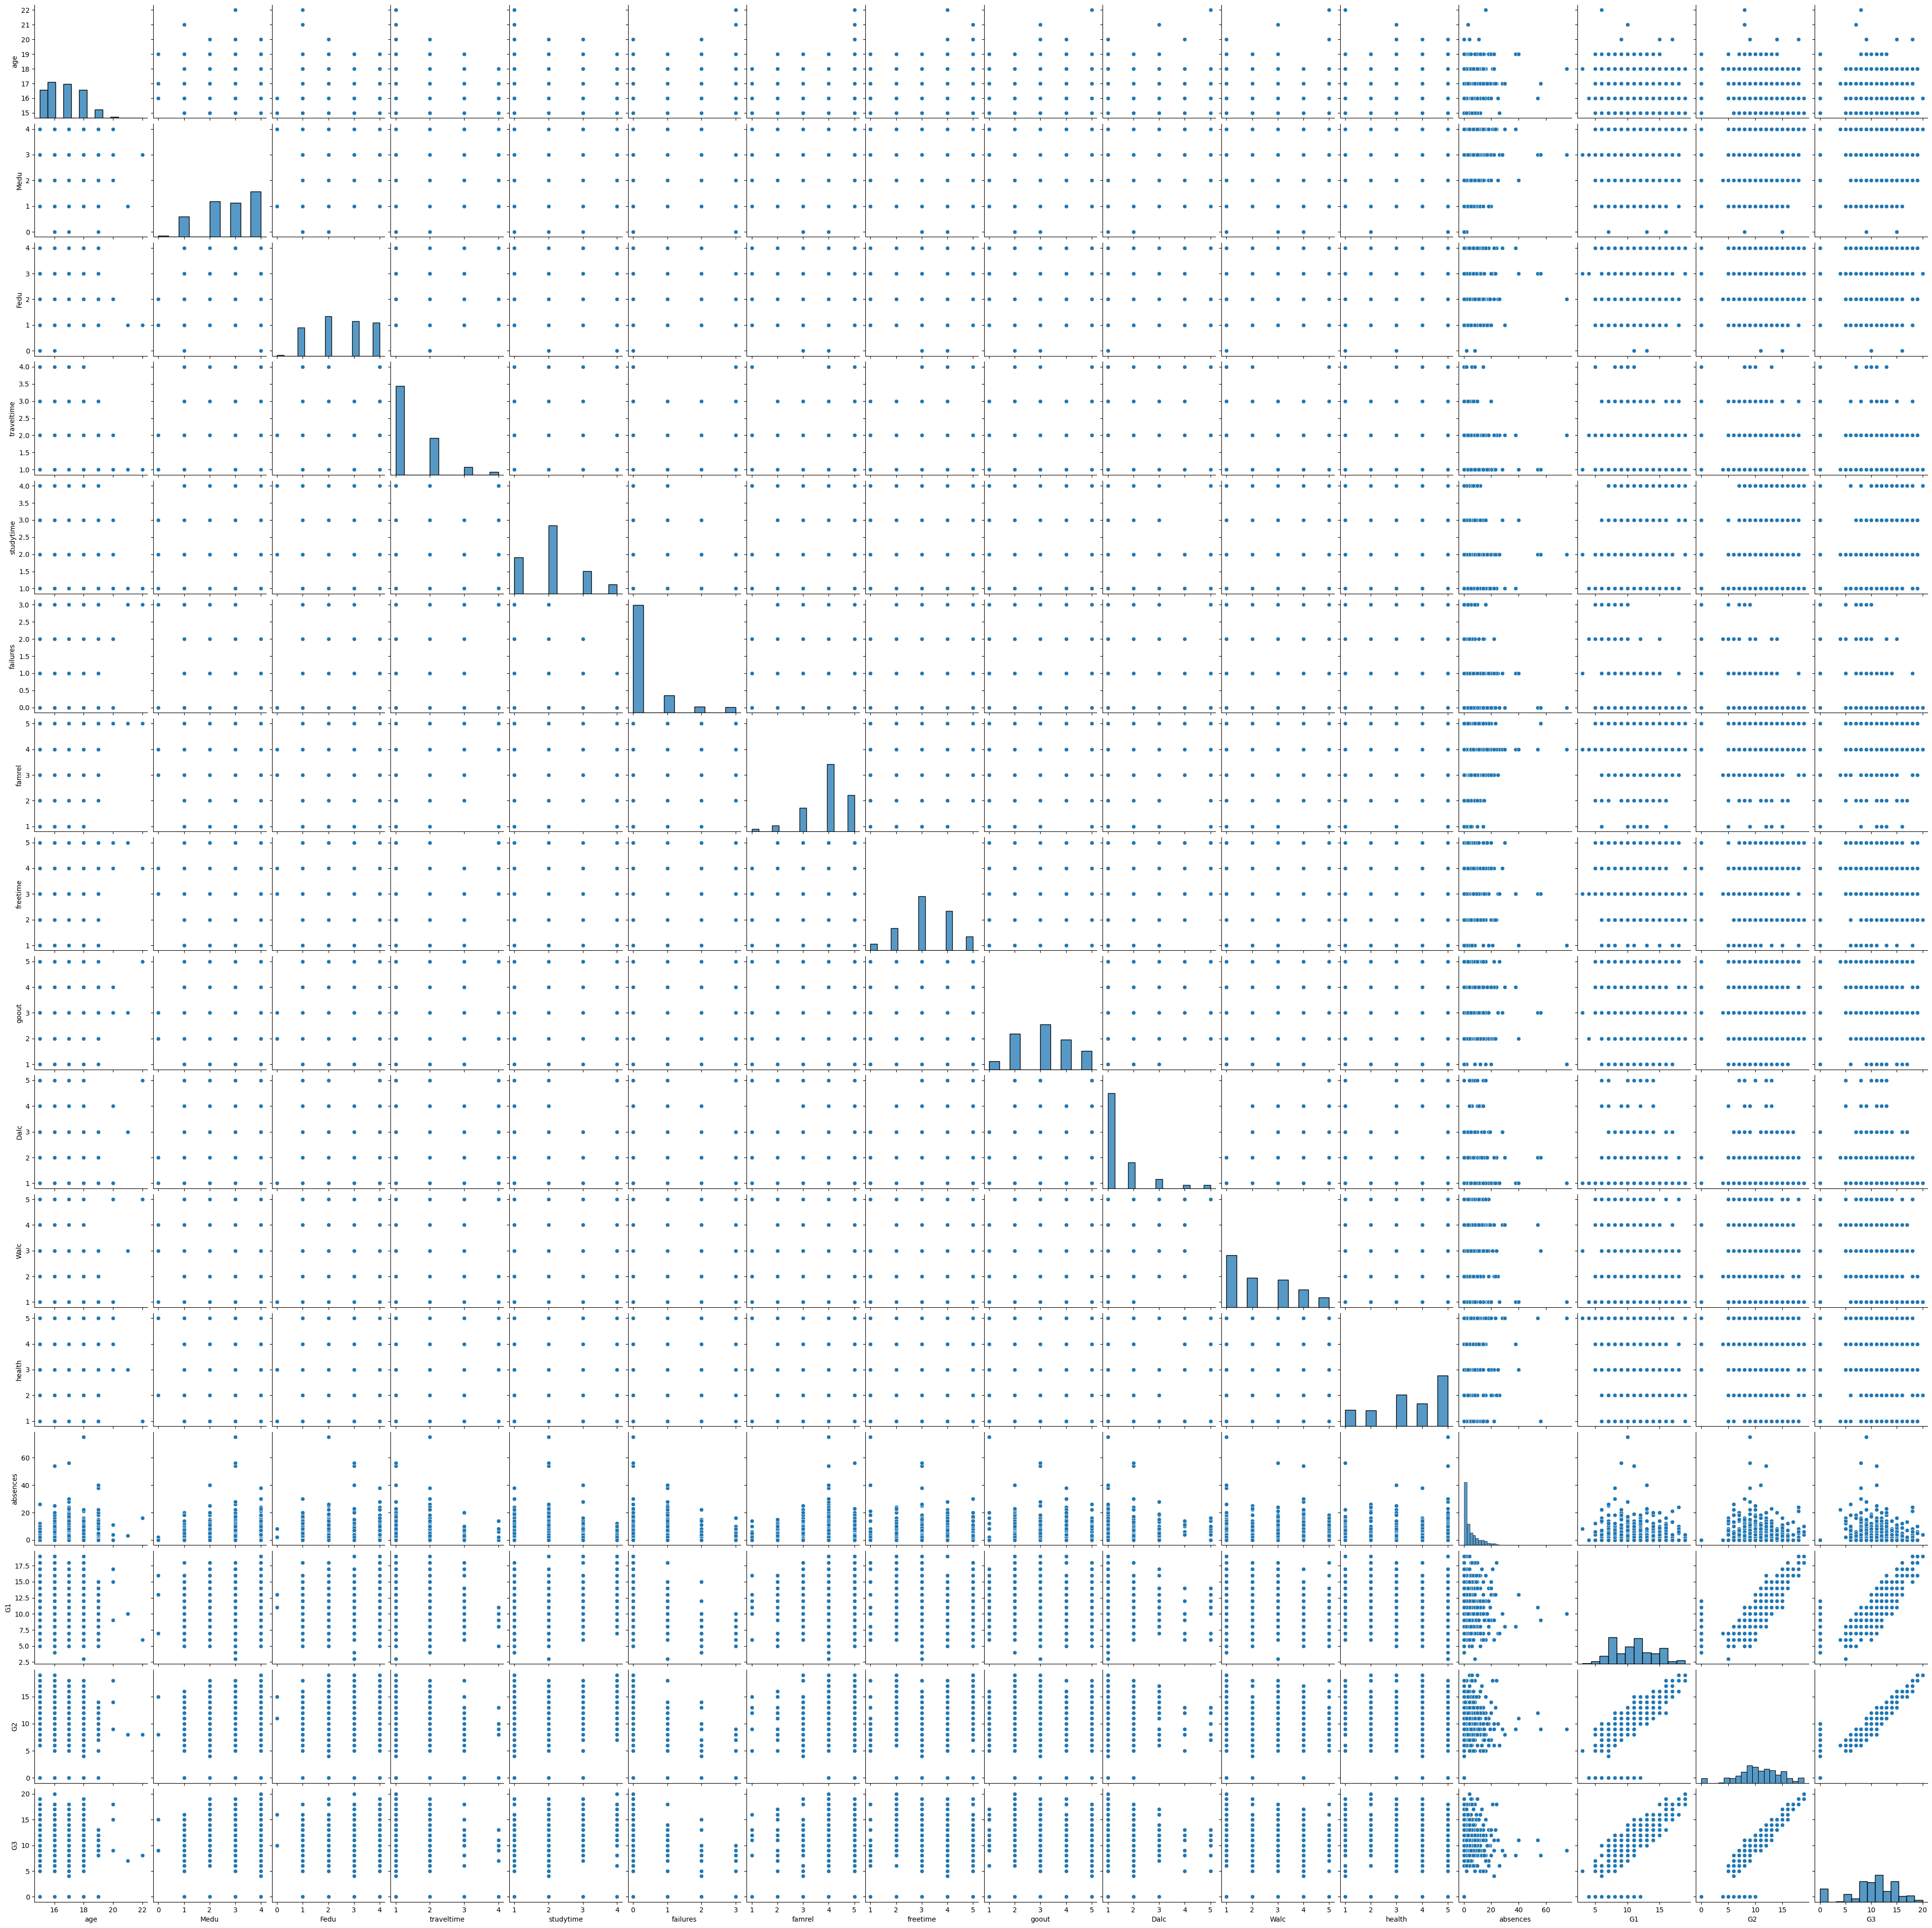

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df[(df['G3'])&(df['sex']=='M')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,18,R,GT3,T,2,1,other,other,...,4,4,3,1,3,5,5,7,6,7
384,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,14,6,5,5
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [9]:
df[(df['G3'])&(df['sex']=='F')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
38,GP,F,15,R,GT3,T,3,4,services,health,...,4,3,2,1,1,5,2,12,12,11
39,GP,F,15,R,GT3,T,2,2,at_home,other,...,4,3,1,1,1,2,8,14,13,13
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,MS,F,17,U,GT3,T,2,2,other,at_home,...,3,4,3,1,1,3,8,13,11,11
373,MS,F,17,R,GT3,T,1,2,other,other,...,3,5,5,1,3,1,14,6,5,5
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15


In [10]:
len(df[df['sex']=='M'])

187

In [11]:
len(df[df['sex']=='F'])

208

In [12]:
corr=df.corr()

<AxesSubplot:>

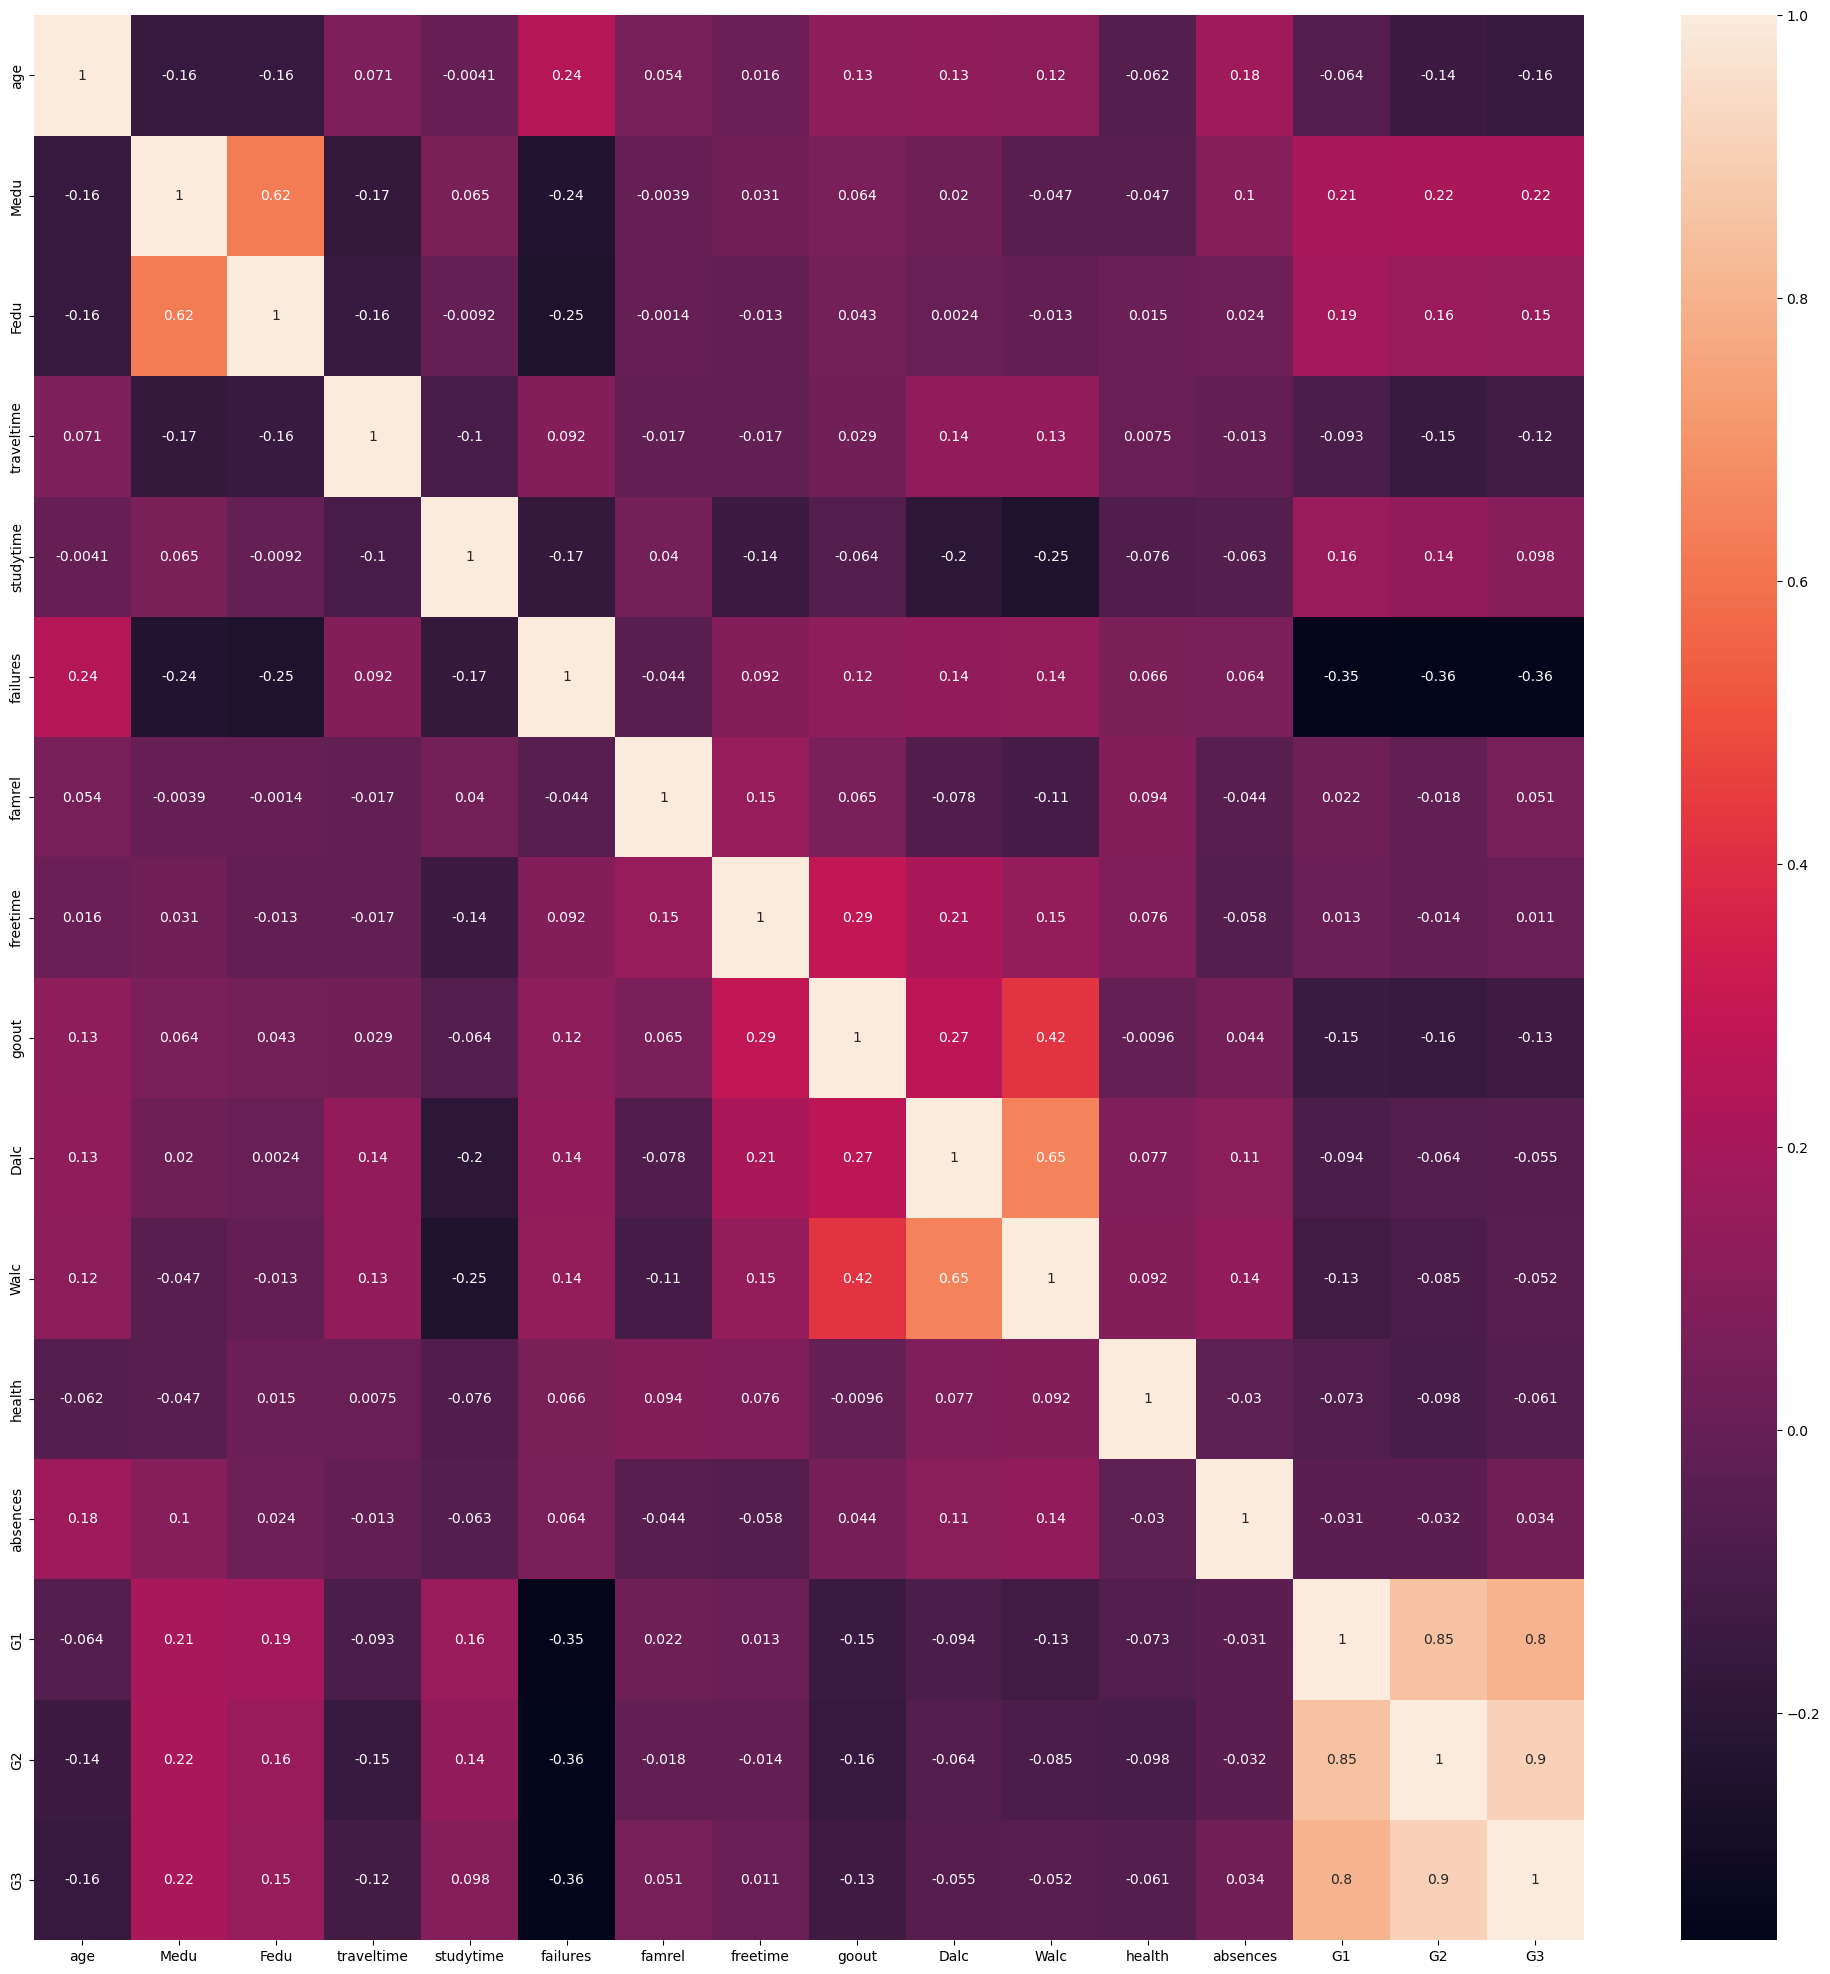

In [13]:
plt.figure(figsize=(25,25))

sns.heatmap(corr,annot=True)

In [14]:
df['gradeavg']=(df['G1']+df['G2']+df['G3'])/3

In [15]:
df.drop(['school','age'],axis=1,inplace=True)

In [16]:
df.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradeavg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,5.666667
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,5.333333
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,8.333333
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,14.666667
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,8.666667


In [17]:
cate=['sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(cate):
    df[i]=le.fit_transform(df[i])


## Linear regression

In [19]:
from sklearn.model_selection import train_test_split
x=df.drop('G3',axis=1)
y=df['G3']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=3,random_state=100)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
log=LinearRegression()

In [23]:
log.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=log.predict(x_test)


In [25]:
log.score(x_test,y_test)

1.0